# Storytelling Data Visualization on Exchange Rates

The goal of this analysis is to analyze changes in exchange rates from 1999 to 2020. In particular, this analysis will focus on the U.S. Dollar exchange rate using data visualization techniques. Of interest, an analysis of the U.S. Dollar exhange rate during the COVID-19 Global Pandemic is included at the end.

In [249]:
import pandas as pd

In [250]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [251]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [252]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [253]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

We can see 40 columns and 5699 rows. Most columns are object type, with only a few as float64. There are multiple columns with non values.

Now we will clean the data. First, let's rename two of the columns and convert another to datetime.

In [254]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', ignore_index=True,
                           inplace=True)

In [255]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

In [256]:
euro_to_dollar['US_dollar'].value_counts() #62 value counts of '-'

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.4425     1
1.0741     1
1.2041     1
1.2682     1
1.0134     1
Name: US_dollar, Length: 3528, dtype: int64

Let's remove the rows that have '-' as the US_dollar value

In [257]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [258]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [259]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


Now we will calculate a rolling mean for the US_dollar colum using a moving window of 30 days and assign it to a new column called rolling_mean.

In [260]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

We will now create a storytelling data visualization using the data we have. In this case, we will show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline using a ling plot. This graph will be tailored to readers of financial and economic news.

In [261]:
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


In [262]:
#import matplotlib.pyplot
import matplotlib.pyplot as plt

In [263]:
#extract year 
euro_to_dollar['year'] = euro_to_dollar['Time'].dt.year

In [264]:
euro_to_dollar

,Time,US_dollar,rolling_mean,year
0,1999-01-04,1.1789,NaN,1999
1,1999-01-05,1.1790,NaN,1999
2,1999-01-06,1.1743,NaN,1999
3,1999-01-07,1.1632,NaN,1999
4,1999-01-08,1.1659,NaN,1999
...,...,...,...,...
5694,2021-01-04,1.2296,1.211170,2021
5695,2021-01-05,1.2271,1.212530,2021
5696,2021-01-06,1.2338,1.213987,2021
5697,2021-01-07,1.2276,1.215357,2021


In [265]:
#Extract 2016 - 2019 Data for the baseline
Baseline16_19 = euro_to_dollar.copy()[(euro_to_dollar['year'] >= 2016) & (euro_to_dollar['year'] <= 2019)]

In [266]:
Baseline16_19

,Time,US_dollar,rolling_mean,year
4415,2016-01-04,1.0898,1.081743,2016
4416,2016-01-05,1.0746,1.081937,2016
4417,2016-01-06,1.0742,1.082307,2016
4418,2016-01-07,1.0868,1.083030,2016
4419,2016-01-08,1.0861,1.083947,2016
...,...,...,...,...
5432,2019-12-23,1.1075,1.106783,2019
5433,2019-12-24,1.1080,1.107000,2019
5434,2019-12-27,1.1153,1.107490,2019
5435,2019-12-30,1.1189,1.108130,2019


In [267]:
#Extract 2020 Data for COVID effects on Exchange Rates
Data2020 = euro_to_dollar.copy()[euro_to_dollar['year'] == 2020]

In [268]:
Data2020

,Time,US_dollar,rolling_mean,year
5437,2020-01-02,1.1193,1.109237,2020
5438,2020-01-03,1.1147,1.109470,2020
5439,2020-01-06,1.1194,1.109920,2020
5440,2020-01-07,1.1172,1.110190,2020
5441,2020-01-08,1.1115,1.110380,2020
...,...,...,...,...
5689,2020-12-24,1.2193,1.204173,2020
5690,2020-12-28,1.2219,1.205520,2020
5691,2020-12-29,1.2259,1.206950,2020
5692,2020-12-30,1.2281,1.208280,2020


In [269]:
total = euro_to_dollar.copy()[(euro_to_dollar['year'] >= 2016) & (euro_to_dollar['year'] <= 2020)]

In [270]:
total

,Time,US_dollar,rolling_mean,year
4415,2016-01-04,1.0898,1.081743,2016
4416,2016-01-05,1.0746,1.081937,2016
4417,2016-01-06,1.0742,1.082307,2016
4418,2016-01-07,1.0868,1.083030,2016
4419,2016-01-08,1.0861,1.083947,2016
...,...,...,...,...
5689,2020-12-24,1.2193,1.204173,2020
5690,2020-12-28,1.2219,1.205520,2020
5691,2020-12-29,1.2259,1.206950,2020
5692,2020-12-30,1.2281,1.208280,2020


In [271]:
total[total['year'] == 2020].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 5437 to 5693
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          257 non-null    datetime64[ns]
 1   US_dollar     257 non-null    float64       
 2   rolling_mean  257 non-null    float64       
 3   year          257 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 10.0 KB


In [272]:
total['Time'][1022:]

5437   2020-01-02
5438   2020-01-03
5439   2020-01-06
5440   2020-01-07
5441   2020-01-08
          ...    
5689   2020-12-24
5690   2020-12-28
5691   2020-12-29
5692   2020-12-30
5693   2020-12-31
Name: Time, Length: 257, dtype: datetime64[ns]

In [273]:
Baseline16_19['rolling_mean'].sort_values(ascending = False)


4974    1.235627
4973    1.235580
4972    1.235363
4975    1.235143
4976    1.234887
          ...   
4679    1.053330
4684    1.053137
4687    1.053017
4685    1.052930
4686    1.052497
Name: rolling_mean, Length: 1022, dtype: float64

In [274]:
Baseline16_19.describe()

,US_dollar,rolling_mean,year
count,1022.000000,1022.000000,1022.000000
mean,1.134200,1.133871,2017.497065
std,0.044554,0.043644,1.119453
min,1.036400,1.052497,2016.000000
25%,1.107500,1.106753,2016.000000
50%,1.127900,1.126697,2017.000000
75%,1.164125,1.164330,2018.000000
max,1.249300,1.235627,2019.000000


In [328]:
Data2020.describe()

,US_dollar,rolling_mean,year
count,257.000000,257.000000,257.0
mean,1.142196,1.136209,2020.0
std,0.044505,0.039050,0.0
min,1.070700,1.084997,2020.0
25%,1.100100,1.100930,2020.0
50%,1.133600,1.121130,2020.0
75%,1.181400,1.178023,2020.0
max,1.228100,1.209623,2020.0


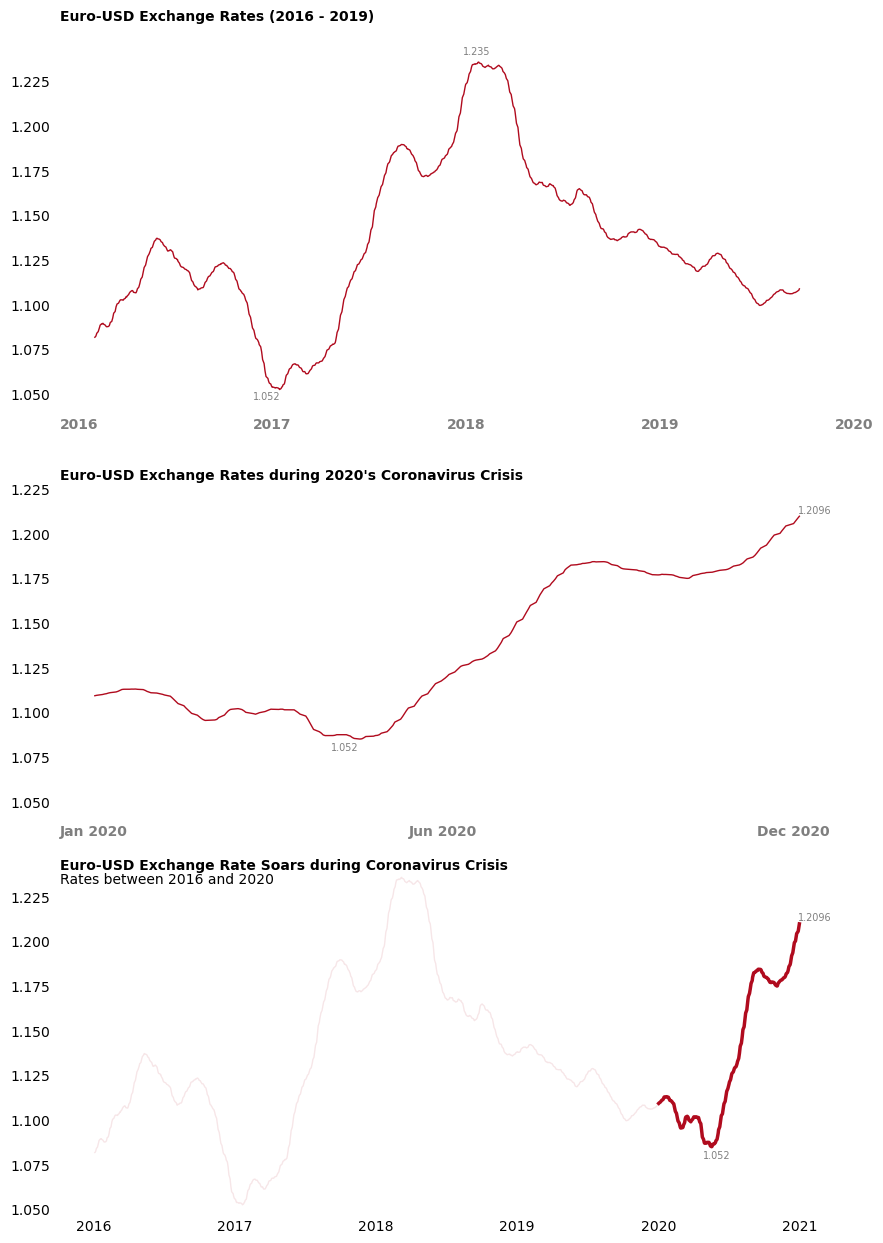

In [437]:
import matplotlib.style as style
style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,15
                                                                    ))


axes = [ax1, ax2]
for ax in axes:
    ax.set_xticklabels([])


        
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.tick_params(left = 0, bottom = 0)
    ax.set_ylim(1.050, 1.24)
    for i in ['left', 'right', 'bottom', 'top']:
        ax.spines[i].set_visible(False)

    

ax1.plot(Baseline16_19['Time'], Baseline16_19['rolling_mean'], color = '#b00b1e', linewidth = 1)
ax1.text(x = 0.52, y = 1, s = '1.235', transform = ax1.transAxes, alpha = 0.5, fontsize = 7)
ax1.text(x = 0.25, y = -.015, s = '1.052', transform = ax1.transAxes, alpha = 0.5, fontsize = 7)
ax1.text(x = 0, y = 1.1, s = 'Euro-USD Exchange Rates (2016 - 2019)', weight = 'bold', transform = ax1.transAxes)
x = 0
for year in ['2016', '2017', '2018', '2019', '2020']:
    ax1.text(x, -0.1, year, alpha = 0.5, transform = ax1.transAxes, weight = 'bold')
    x += 0.25

ax2.plot(Data2020['Time'], Data2020['rolling_mean'], color = '#b00b1e', linewidth = 1)
ax2.text(x = .953, y = .85, s = '1.2096', transform = ax2.transAxes, alpha = 0.5, fontsize = 7)
ax2.text(x = 0.35, y = .15, s = '1.052', transform = ax2.transAxes, alpha = 0.5, fontsize = 7)
ax2.text(x = 0, y = 0.95, s = 'Euro-USD Exchange Rates during 2020\'s Coronavirus Crisis', weight = 'bold', transform = ax2.transAxes)
x = 0
for month in ['Jan 2020', 'Jun 2020', 'Dec 2020']:
    ax2.text(x, -0.1, month, alpha = 0.5, transform = ax2.transAxes, weight = 'bold')
    x += 0.45

ax3.plot(total['Time'], total['rolling_mean'], color = '#b00b1e', alpha = 0.1, linewidth = 1)
ax3.plot(total['Time'][1022:], total['rolling_mean'][1022:], color = '#b00b1e', linewidth = 2.5)
ax3.text(x = .953, y = .85, s = '1.2096', transform = ax3.transAxes, alpha = 0.5,fontsize = 7)
ax3.text(x = 0.83, y = 0.15, s = '1.052', transform = ax3.transAxes, alpha = 0.5, fontsize = 7)
ax3.text(x = 0, y = 1, s = 'Euro-USD Exchange Rate Soars during Coronavirus Crisis', weight = 'bold', transform = ax3.transAxes)
ax3.text(x = 0, y = .96, s = 'Rates between 2016 and 2020', transform = ax3.transAxes)


plt.show()



We can see in our storytelling graph that the Euro-USD exchange rate soared during the Coronavirus Crisis. This means that the US Dollar lost strength as compared to the Euro.